# Predict

# Import Packages

In [1]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
import numpy as np
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
try:
    from tensorflow.python.util import module_wrapper as deprecation
except ImportError:
    from tensorflow.python.util import deprecation_wrapper as deprecation
deprecation._PER_MODULE_WARNING_LIMIT = 0

In [3]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Import Data

In [4]:
nbatch = 128

In [5]:
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [71]:
validation_set = validation_datagen.flow_from_directory('data/test',
                                            target_size=(128,128),
                                            batch_size =nbatch,
                                            class_mode = 'binary')

Found 238829 images belonging to 2 classes.


(128, 128, 128, 3) (128,)


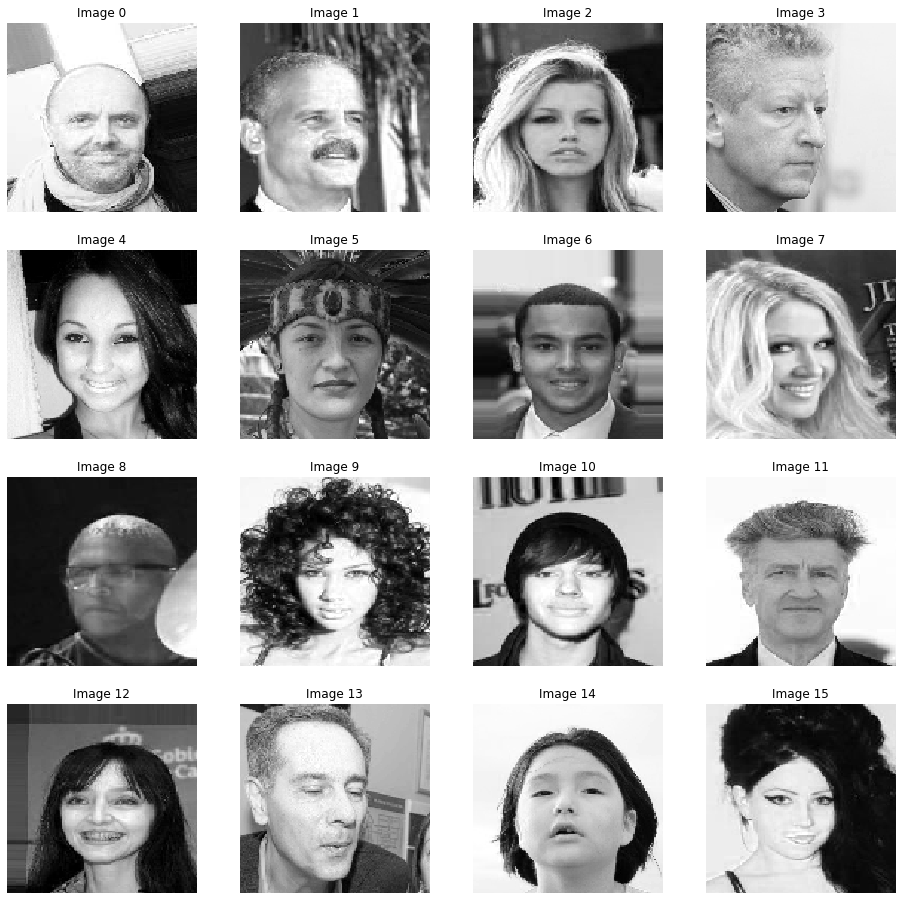

In [72]:
for X, y in validation_set:
    print(X.shape, y.shape)
    plt.figure(figsize=(16,16))
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.axis('off')
        plt.title('Image ' + str(i))
        img = np.uint8(255*X[i,:,:,0])
        plt.imshow(img, cmap='gray')
    break

# Load Model

In [73]:
from tensorflow.keras.models import save_model, load_model
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam

In [74]:
# for X, y in validation_set:
#     print(X)

In [86]:
CNNDetectionmodel = load_model('models/CNNmodel.h5')

In [87]:
CNNDetectionmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [88]:
CNNDetectionmodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)            

In [78]:
# for X, y in validation_set:
#     result = model.predict(X, batch_size=1)
#     print(result)


# Use Model

In [79]:
result_batch2 = CNNDetectionmodel.predict(validation_set, batch_size = 1)
print(len(result_batch2))

238829


In [80]:
print(result_batch2)

[[0.5339067 ]
 [0.54101217]
 [0.535317  ]
 ...
 [0.5344479 ]
 [0.5578484 ]
 [0.5322737 ]]


In [81]:
result_batch2_classes = CNNDetectionmodel.predict_classes(validation_set, batch_size = 1)
print(len(result_batch2_classes))

# (model.predict(x) > 0.5).astype("int32")

238829


In [82]:
print(result_batch2_classes)

[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


In [83]:
# result_batch2_classes = (CNNDetectionmodel.predict(validation_set, batch_size = 1) > 0.5).astype("int32")
# print(len(result_batch2))

In [96]:
def prediction_bins(prediction_results):

    fake_50 = 0
    fake_55 = 0
    fake_60 = 0
    fake_65 = 0
    fake_70 = 0
    fake_75 = 0
    fake_80 = 0
    fake_85 = 0
    fake_90 = 0
    fake_95 = 0
    fake_100 = 0
    real_50 = 0

    for score in prediction_results:
        if score >= 1: fake_100 = fake_100 + 1
        elif score >= 0.95: fake_95 = fake_95 + 1
        elif score >= 0.90: fake_90 = fake_90 + 1
        elif score >= 0.85: fake_85 = fake_85 + 1
        elif score >= 0.80: fake_80 = fake_80 + 1
        elif score >= 0.75: fake_75 = fake_75 + 1
        elif score >= 0.70: fake_70 = fake_70 + 1
        elif score >= 0.65: fake_65 = fake_65 + 1
        elif score >= 0.60: fake_60 = fake_60 + 1  
        elif score >= 0.55: fake_55 = fake_55 + 1
        elif score >= 0.50: fake_50 = fake_50 + 1  
        else : real_50 = real_50 + 1

    print(
    real_50, fake_50, fake_55, fake_60, fake_65, fake_70, 
    fake_75, fake_80, fake_85, fake_90, fake_95, fake_100)

In [20]:
# print(result)

In [21]:
# predict_real = 0
# predict_fake = 0

# for X, y in validation_set:
#     result = model.predict(X, batch_size=1)
#     if result > 0.5:
#         predict_real += 1
#     else:
#         predict_fake += 1

# print("real predictions " + predict_real)
# print("fake predictions " + predict_fake)

In [22]:
# predict_real = 0
# predict_fake = 0

(128, 128, 128, 3) (128,)


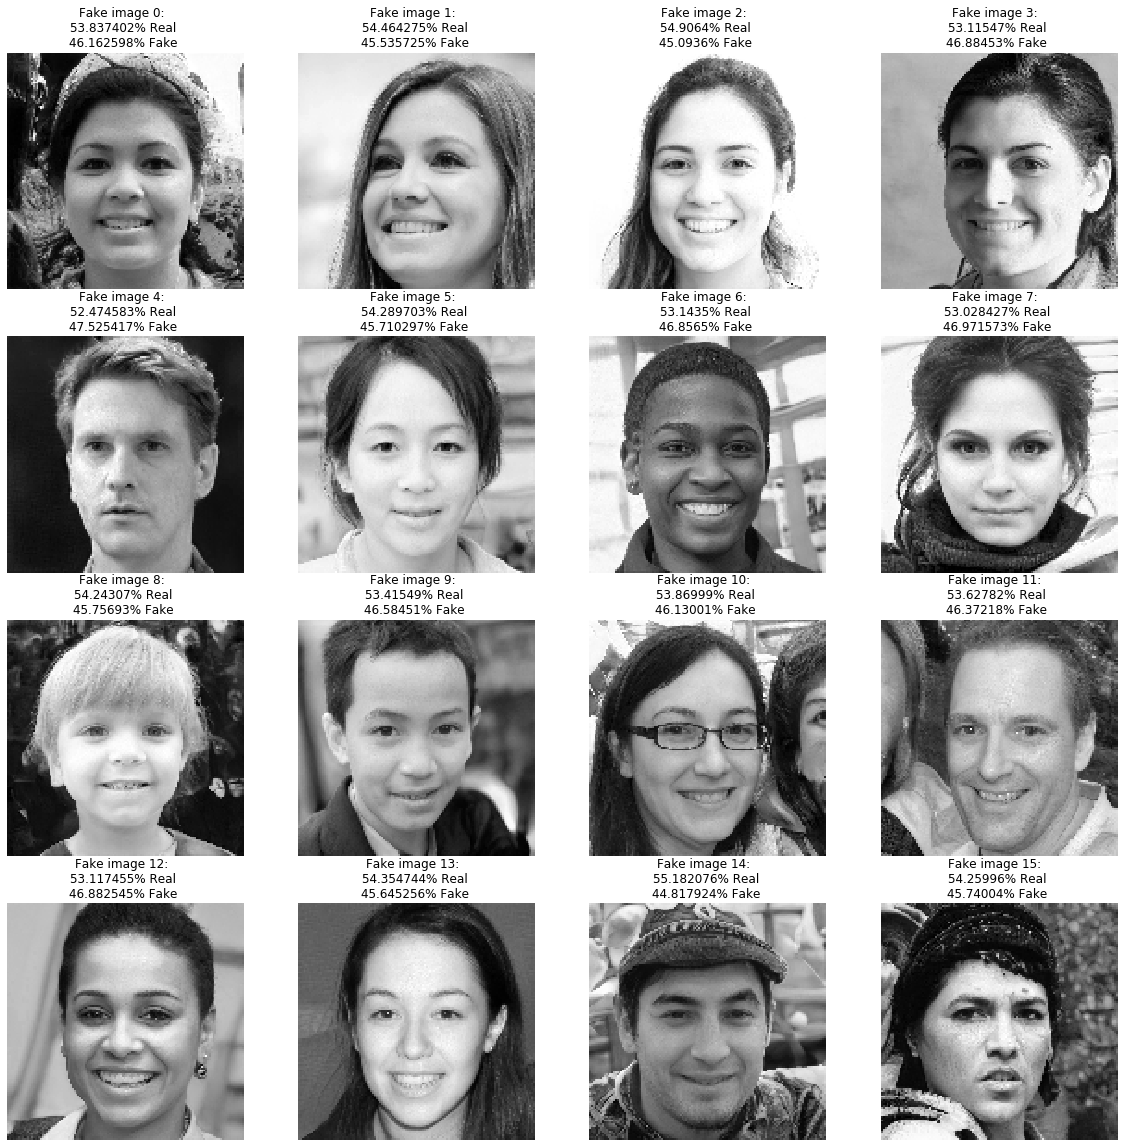

In [55]:
for X, y in validation_set:
    print(X.shape, y.shape)
    plt.figure(figsize=(20,20))
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.axis('off')
        plt.title("Fake image " + str(i) +":  \n" 
                  + str(100*result_batch2[i]).strip("[]") + "% Real \n" 
                  + str(100*(1-result_batch2[i])).strip("[]") +"% Fake ")
        img = np.uint8(255*X[i,:,:,0])
        plt.imshow(img, cmap='gray')
    break

# Inspect Layers

In [35]:
import glob
import matplotlib.image as mpimg
import imageio as im
from tensorflow.keras import models
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

In [36]:
tf.graph_util.import_graph_def

<function tensorflow.python.framework.importer.import_graph_def(graph_def, input_map=None, return_elements=None, name=None, op_dict=None, producer_op_list=None)>

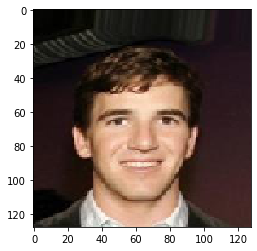

(1, 128, 128, 3)


In [42]:
img_path = "data/test/img_align_celeba/180002.jpg"

img = image.load_img(img_path, target_size=(128, 128))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

plt.imshow(img_tensor[0])
plt.show()

print(img_tensor.shape)

In [43]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = CNNDetectionmodel.predict(images, batch_size=1)

print("0 is Fake, 1 is Real")
print("Predicted class is:",classes)

0 is Fake, 1 is Real
Predicted class is: [[1.]]


In [44]:
# Extracts the outputs of the top 9 layers
layer_outputs = [layer.output for layer in CNNDetectionmodel.layers[:9]]

# Creates a model that will return these outputs, given the model input
activation_model = models.Model(inputs=CNNDetectionmodel.input, outputs=layer_outputs) 

# Returns a list of five Numpy arrays: one array per layer activation
activations = activation_model.predict(img_tensor) 

first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 126, 126, 32)


# First Layer

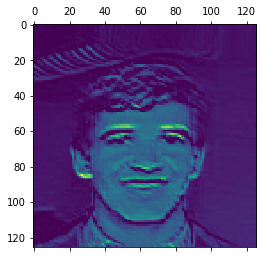

In [45]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

# Layer Output

/home/matthew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


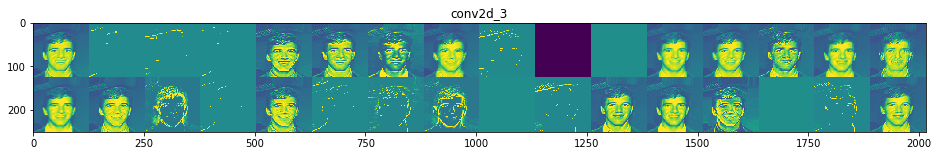

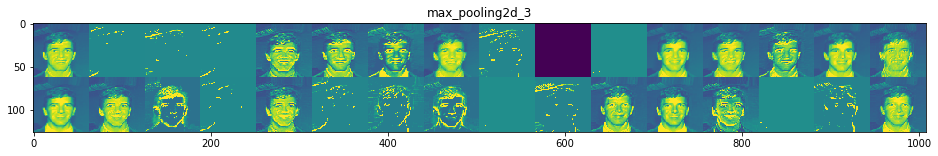

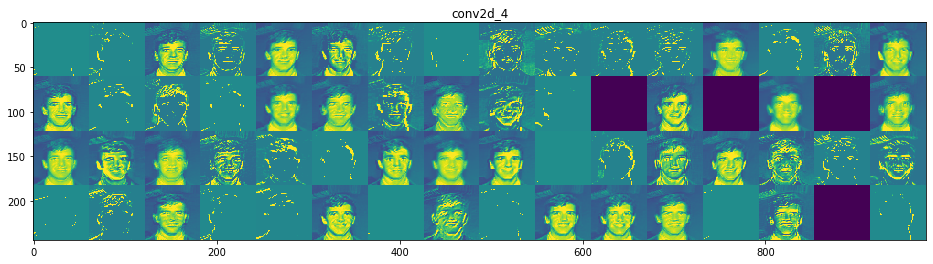

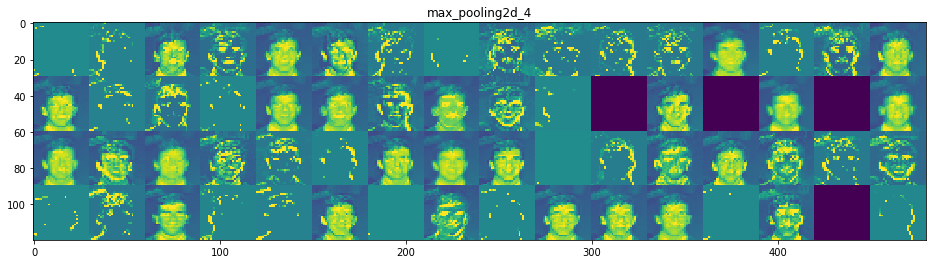

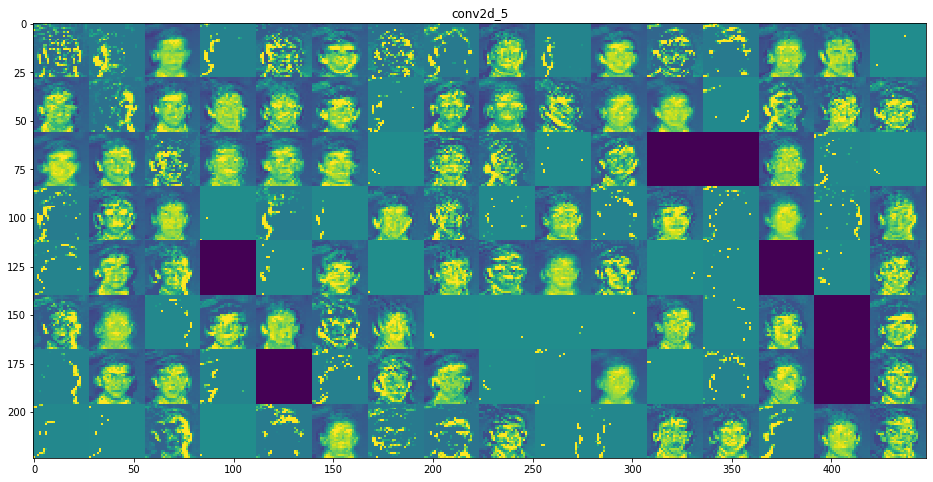

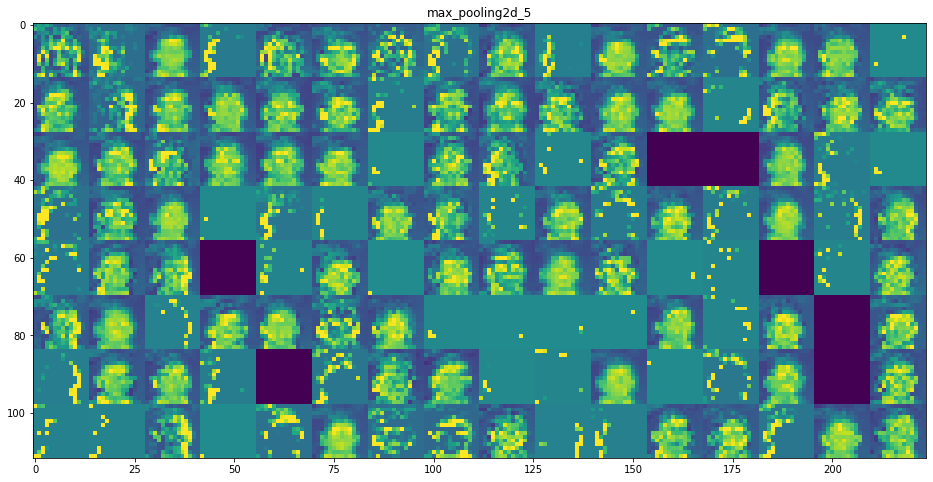

In [46]:
layer_names = []
for layer in CNNDetectionmodel.layers[:6]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                            :, :,
                                            col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                        row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [89]:
validation_set = validation_datagen.flow_from_directory('data/test',
                                            target_size=(128,128),
                                            batch_size =nbatch,
                                            class_mode = 'binary')

Found 27258 images belonging to 2 classes.


ValueError: too many values to unpack (expected 2)

In [91]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = CNNDetectionmodel.evaluate(validation_set, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
213/213 [==============================] - 489s 2s/step - loss: 0.6628 - accuracy: 0.7432
test loss, test acc: [0.6627745032310486, 0.7431946396827698]


In [93]:
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = CNNDetectionmodel.predict(validation_set)
print("predictions shape:", predictions.shape)


Generate predictions for 3 samples
predictions shape: (27258, 1)


In [97]:
print(predictions)
prediction_bins(predictions)

[[0.5201029]
 [0.5443109]
 [0.5558981]
 ...
 [0.5265555]
 [0.5173055]
 [0.53833  ]]
0 25234 2024 0 0 0 0 0 0 0 0 0
